## **Prediction Rule Ensembles in R**

From the paper **Fitting Prediction Rule Ensembles with R Package pre** located in https://arxiv.org/pdf/1707.07149.pdf

## **Example: prediction of depression**

Predict depressive symptomatology as measured by the Beck Depression Inventory (BDI)

In [3]:
#install.packages('pre')

also installing the dependencies ‘plotrix’, ‘plotmo’, ‘TeachingDemos’, ‘libcoin’, ‘inum’, ‘earth’, ‘partykit’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [4]:
library("pre")
data("carrillo")

In [5]:
head(carrillo)

n1,n2,n3,n4,n5,n6,ntot,e1,e2,e3,⋯,open3,open4,open6,opentot,altot,contot,bdi,sexo,edad,open5
17,9,16,10,20,11,83,23,15,13,⋯,22,16,24,114,54,58,0,1,38,15
23,23,24,23,23,21,137,13,8,4,⋯,18,18,26,122,47,48,5,1,49,19
17,16,13,9,16,10,81,25,25,20,⋯,18,13,17,85,33,42,4,1,33,12
18,15,10,16,13,12,84,21,20,15,⋯,22,18,23,134,48,39,4,2,21,25
15,14,15,8,14,11,77,22,22,20,⋯,14,13,18,82,31,39,3,1,49,13
24,15,20,12,12,20,103,17,18,19,⋯,14,14,19,96,37,55,14,2,64,9


* The printed result shows the rules with their corresponding coefficients. 
* Base learners with an estimated coefficient of 0 are omitted from this output, by default. 
* The first column (rule) indicates the type of base learner: a rule (e.g., rule80) or linear term (e.g., n3). 
* The description column lists the conditions for rules and the winsorizing points for linear terms, if winsorizing was performed (note that n3 was winsorized with the default value of β = .025). 
* The first rule shows that observations with a higher value of n4 (i.e., n4 > 15) and a lower value of open4 (i.e., open4 ≤ 13) have an expected BDI score 2.84 higher than observations that do not match these conditions.

In [6]:
set.seed(42)
carrillo.ens <- pre(bdi ~ ., data = carrillo)
carrillo.ens


Final ensemble with cv error within 1se of minimum: 
  lambda =  0.64585
  number of terms = 14
  mean cv error (se) = 35.71612 (6.164598)

  cv error type : Mean-Squared Error

         rule  coefficient               description
  (Intercept)  10.13727152                      <NA>
       rule80   2.83654460     n4 > 15 & open4 <= 13
       rule97  -1.37291523     n2 <= 16 & open4 > 10
       rule18  -1.19069084  ntot <= 109 & etot > 101
       rule88  -1.14486723     ntot <= 109 & e6 > 15
       rule40  -1.03141667                  n6 <= 19
       rule12  -1.00552514                  n3 <= 22
        rule1  -0.87187500                  n3 <= 17
      rule105  -0.40072865     n2 <= 16 & open5 > 11
       rule66   0.37440221   open4 <= 13 & ntot > 82
       rule86  -0.30188949        n2 <= 16 & e6 > 14
       rule42  -0.27353025     n6 <= 19 & open4 > 12
       rule30  -0.21459355    ntot <= 109 & n4 <= 14
           n3   0.17546429         2 <= n3 <= 30.225
       rule46  -0.03074019

We can obtain the estimated (zero and non-zero) coefficients for the base learners in the final ensemble using the coef method

In [8]:
head(coef(carrillo.ens))

,rule,coefficient,description
116,(Intercept),10.137272,NA
77,rule80,2.836545,n4 > 15 & open4 <= 13
94,rule97,-1.372915,n2 <= 16 & open4 > 10
18,rule18,-1.190691,ntot <= 109 & etot > 101
85,rule88,-1.144867,ntot <= 109 & e6 > 15
37,rule40,-1.031417,n6 <= 19


In [10]:
head(predict(carrillo.ens, newdata = carrillo))

1         2         3         4         5         6 
 5.105928 14.348414  4.579535  4.267736  4.930464  8.416076

We can obtain variable and base learner importances using the importance function. By
default, importances are calculated over all training observations, but the importance function also allows for obtaining local importances calculated over a subset of the training data, through specification of the global and quantprobs arguments. To aid in interpretation, we request **standardized importances** in this example, so we can interpret the base learner importances as the absolute value of standardized multiple regression coefficients. 

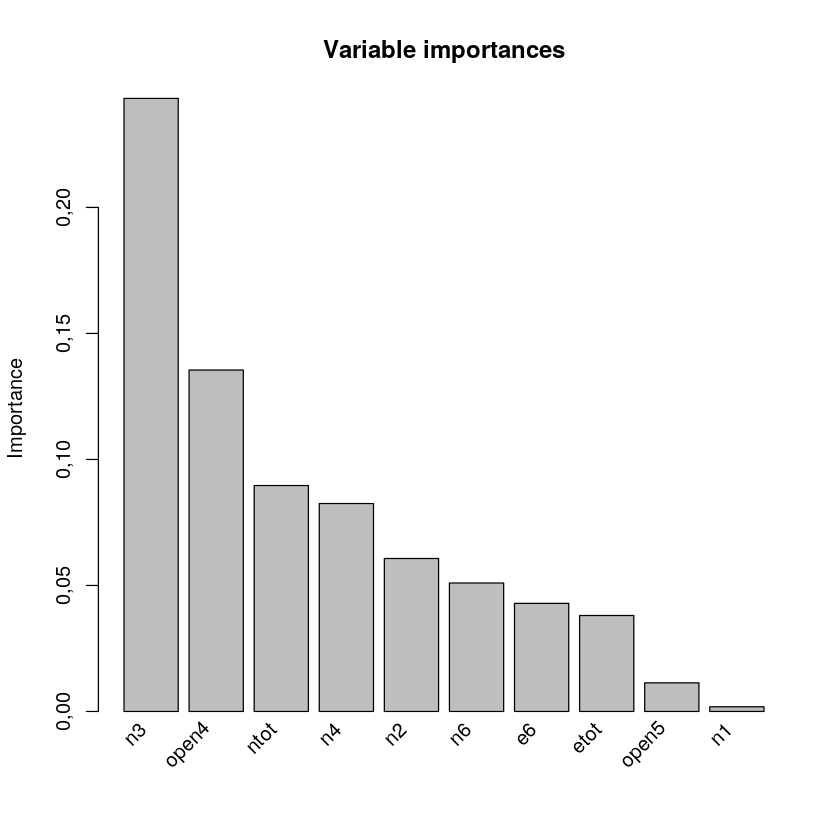

In [11]:
imps <- importance(carrillo.ens, standardize = TRUE, round = 4L)

We can plot (a subset of) the final ensemble using the plot function. Below, standardize = TRUE is specified so that the importances in the plots are standardized, nterms = 6 so that only the six most important base learners will be plotted, plot.dim = c(2,3) so that the rules will be plotted in two rows and three columns and cex = .7 to scale the size of node and edge labels to fit the plot size.

The most important base learner is rule80, involving n4 and open4. The second most important base learner is a linear term, involving n3. Together, these base learners indicate a positive association between neuroticism and depressive symptomatology, and a negative association between extraversion
and openness and depressive symptomatology.

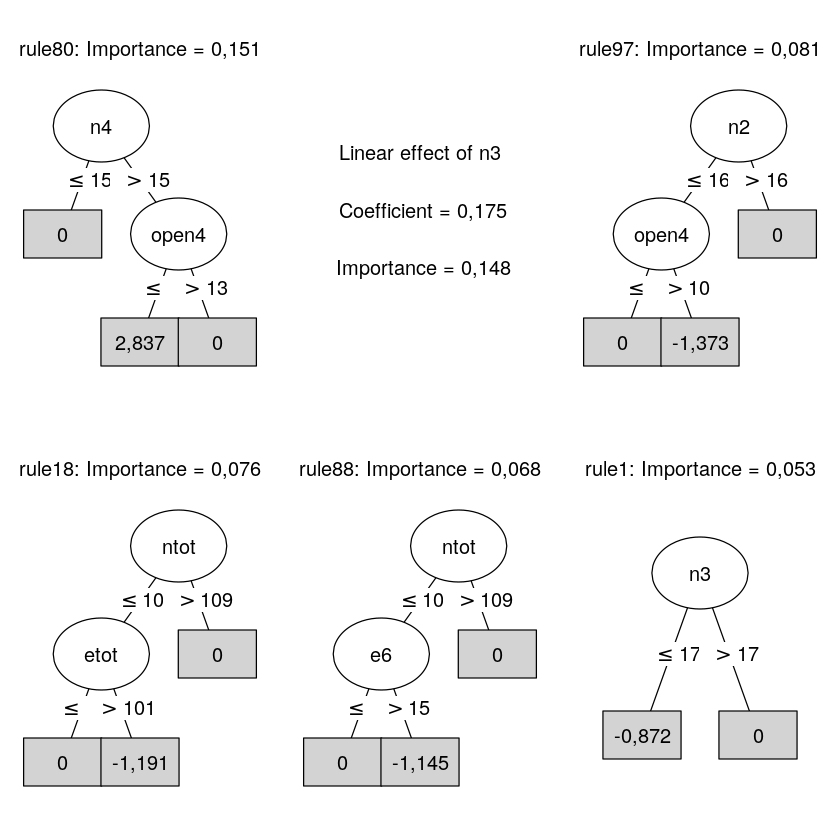

In [13]:
plot(carrillo.ens, nterms = 6, plot.dim = c(2,3), standardize = TRUE, cex = .7)

## **PARTIAL DEPENDENCE PLOTS**

To further inspect the shape of the effect of individual input variables, we can obtain a **partial dependence plot** using the singleplot function.

By default, pairplot employs a plotting color sequence going from yellow (lower values) to red (higher values). Here, a sequence from light to dark grey has been specified through the col argument. Here we can see the effect of the partial dependence of the depression variable on n4 and
open4. The plot indicates that depressive symptomatology increases with increasing values of the neuroticism subscale, and decreases with increasing values of the openness subscale.

We can find this also in python:
![alt text](fig/partial_dependence.png "Title")

In [16]:
#install.packages('akima')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


Loading required package: akima
NOTE: function pairplot uses package 'akima', which has an ACM license. See also https://www.acm.org/publications/policies/software-copyright-notice.


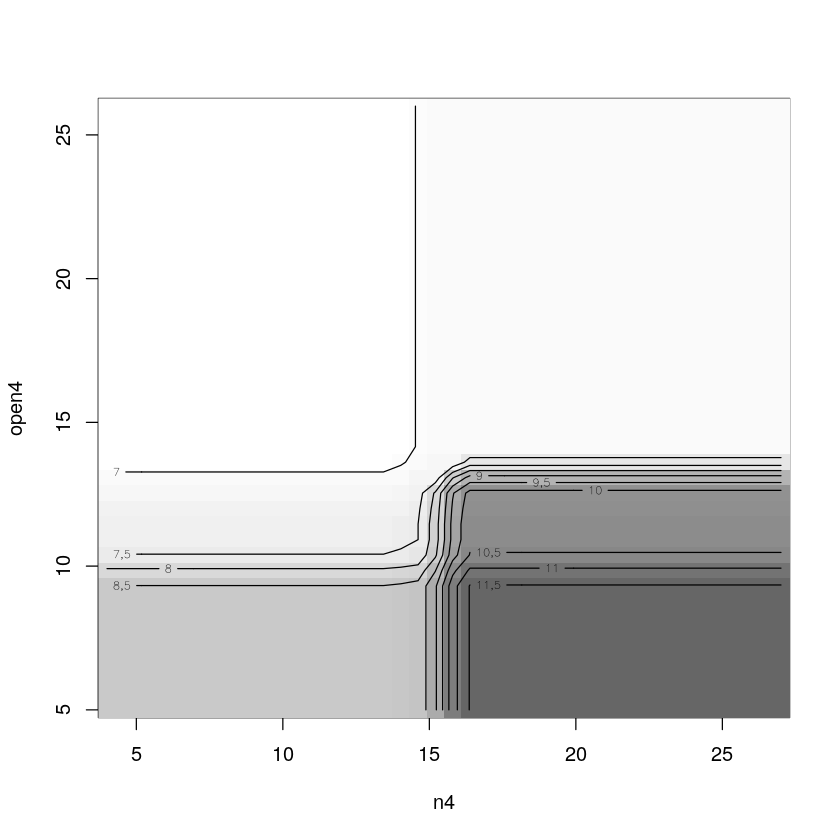

In [17]:
require(akima)
pairplot(carrillo.ens, varnames = c("n4", "open4"), col = grey(seq(1, .4, by = -.01)))